# Analysis of Bixi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df_bixi = pd.read_csv('../data/bixi/bixi.csv') # import bixi.csv created in data_exploration_bixi notebook
years = 6 #number of years  in the period studied
month_per_year = 7 #number of months bixi is open - take into account that 2019 has 1 month less and april and november bixi is open just half of the month
days = 1270 #number of days  in the period studied - see  count_days notebook
mtwt_day = 182 #number of Mondays/Tuesdays/Wednesdays/Thursdays  in the period studied - see  count_days notebook
f_day = 180 #number of Fridays  in the period studied - see  count_days notebook
s_day = 181 #number of Saturdays/Sundays in the period studied - see  count_days notebook
df_stbx19 = pd.read_csv('../data/bixi/Stations_2019.csv')

In [3]:
df_bixi['start_date'] = pd.to_datetime(df_bixi['start_date']) #set 'start_date' and 'end_date'to date type 
df_bixi['end_date'] = pd.to_datetime(df_bixi['end_date'])
df_bixi.head()

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
0,2014-04-15 00:01:00,6209.0,2014-04-15 00:18:00,6436.0,1061,1
1,2014-04-15 00:01:00,6214.0,2014-04-15 00:11:00,6248.0,615,1
2,2014-04-15 00:01:00,6164.0,2014-04-15 00:18:00,6216.0,1031,1
3,2014-04-15 00:01:00,6214.0,2014-04-15 00:24:00,6082.0,1382,1
4,2014-04-15 00:02:00,6149.0,2014-04-15 00:08:00,6265.0,347,1


In [4]:
df_bixi['year_month'] = df_bixi.start_date.dt.to_period('M') #add new column with year and month
df_bixi['year'] = df_bixi.start_date.dt.year #add new column of the year
df_bixi['month'] = df_bixi.start_date.dt.month #add new column of the month
df_bixi['day'] = df_bixi.start_date.dt.dayofweek #add new column of the day
df_bixi['hour'] = df_bixi.start_date.dt.hour #add new column of the hour

In [5]:
df_bixi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26195979 entries, 0 to 26195978
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   start_date          datetime64[ns]
 1   start_station_code  float64       
 2   end_date            datetime64[ns]
 3   end_station_code    float64       
 4   duration_sec        int64         
 5   is_member           int64         
 6   year_month          period[M]     
 7   year                int64         
 8   month               int64         
 9   day                 int64         
 10  hour                int64         
dtypes: datetime64[ns](2), float64(2), int64(6), period[M](1)
memory usage: 2.1 GB


Text(0.5, 1.0, 'Total bike trips per year')

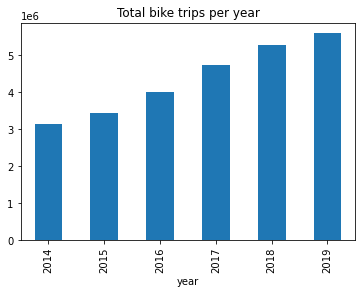

In [22]:
trips_year = df_bixi.pivot_table(index=['year'], aggfunc='size') #pandas series of total numberof trips for each year
trips_year.plot(kind="bar")
plt.title("Total bike trips per year")

Text(0.5, 1.0, 'Total bike trips per month')

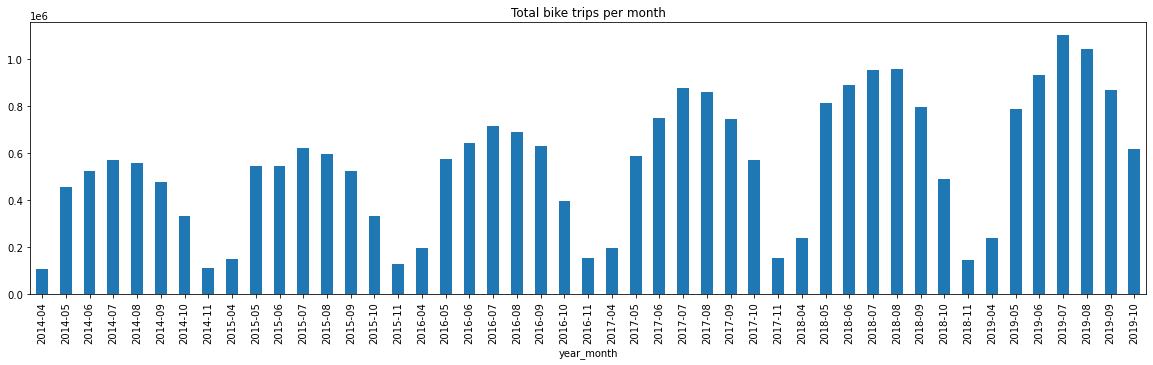

In [26]:
plt.figure(figsize=(20,5))

trips = df_bixi.pivot_table(index=['year_month'], aggfunc='size')  #pandas series of total mumberof trips for each month and year

trips.plot(kind="bar")
plt.title("Total bike trips per month")

Text(0.5, 1.0, 'Average trips per month 2014-2019')

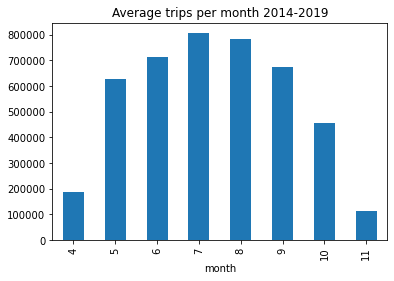

In [34]:
trips_month = df_bixi.pivot_table(index=['month'], aggfunc='size')  #pandas series of total mumberof trips for each month

(trips_month/years).plot(kind="bar") 
plt.title("Average trips per month 2014-2019")

Text(0.5, 1.0, 'Average trips per day 2014-2019')

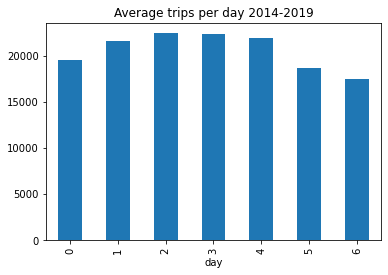

In [36]:
trips_week = df_bixi.pivot_table(index=['day'], aggfunc='size')  #pandas series of total mumber of trips for each day

(trips_week/mtwt_day).plot(kind="bar") #number of trips for each day - 1270 is the total number of days in this period - see count_days nootebook
plt.title("Average trips per day 2014-2019")

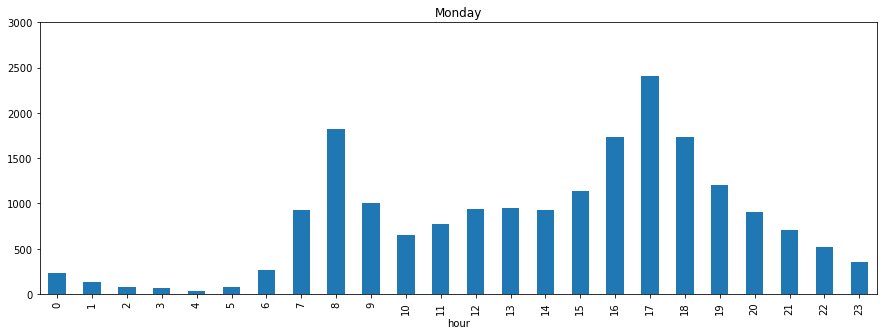

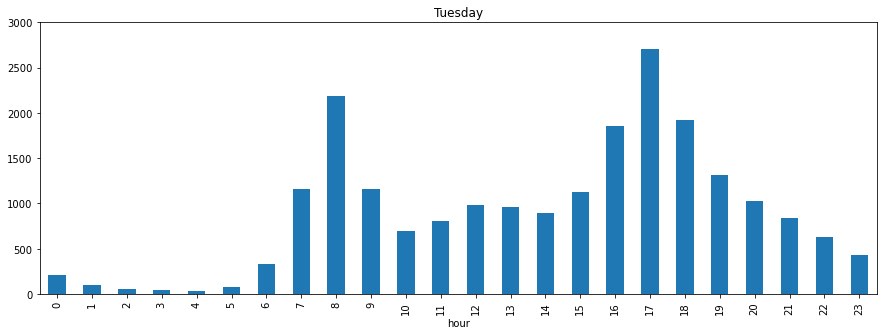

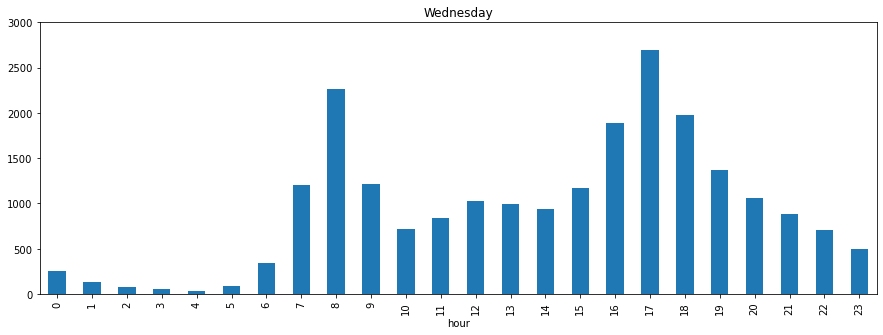

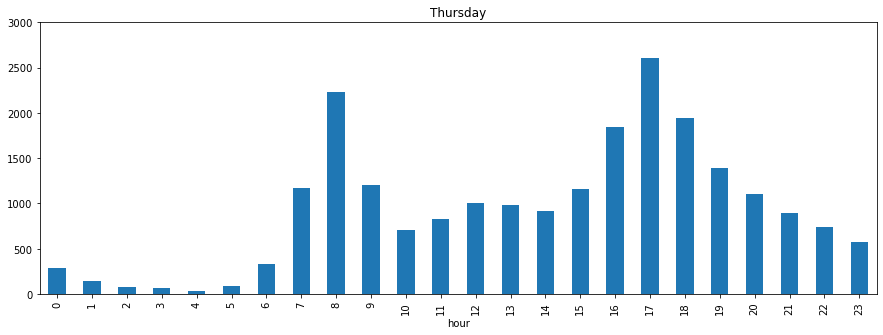

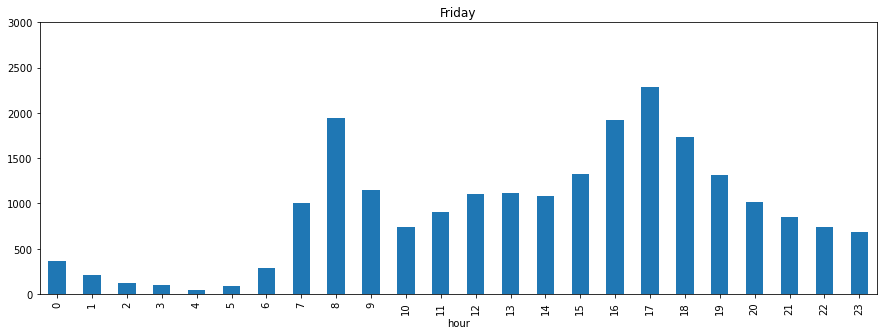

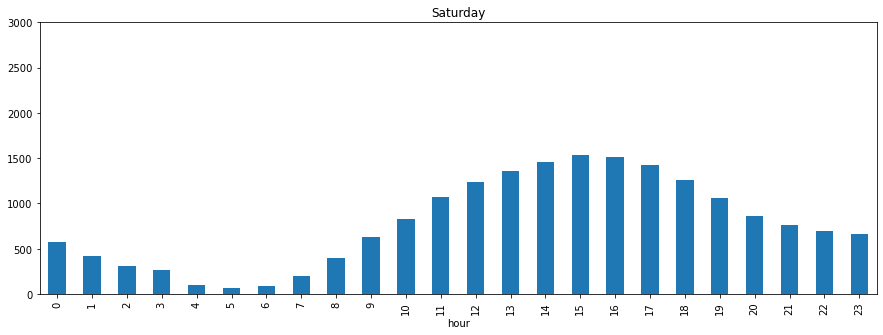

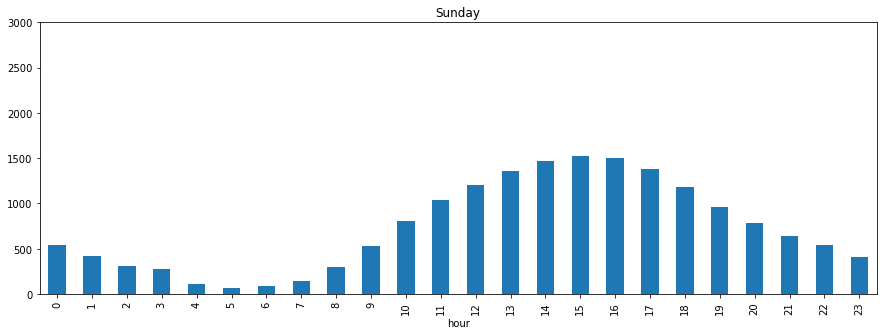

In [52]:
def plot_day_per_hour(df , day):
    df_day = df[df['day'] == day]

    t = df_day.pivot_table(index=['hour'], aggfunc='size')  #pandas series of total mumber of trips for each hour on monday
    n_days = mtwt_day

    if day == 0:
        title = 'Monday'
    if day == 1:
        title = 'Tuesday'
    if day == 2:
        title = 'Wednesday'
    if day == 3:
        title = 'Thursday'
    if day == 4:
        title = 'Friday'
        n_days = f_day
    if day == 5:
        title = 'Saturday'
        n_days = s_day
    if day == 6:
        title = 'Sunday'
        n_days = s_day

    plt.figure(figsize=(15,5))
    plt.ylim(0,3000)
    (t/n_days).plot(kind="bar") 
    return plt.title(title)

for d in range(7):
    plot_day_per_hour(df_bixi , d)

In [42]:
# test to create plot_day_per_hour function

#df_monday = df_bixi[df_bixi['day'] == 0]
#monday_trips = df_monday.pivot_table(index=['hour'], aggfunc='size') 

#(monday_trips/mtwt_day).plot(kind="bar")
#plt.title("Monday")

In [9]:
df_start_stations = df_bixi.groupby('start_station_code').count()['end_station_code'].to_frame()
df_start_stations = df_start_stations.reset_index()
df_start_stations = df_start_stations.rename(columns={'end_station_code' : 'bici out'})
df_start_stations.head()

,start_station_code,bici out
0,4000.0,17467
1,4001.0,7092
2,4002.0,15959
3,5002.0,2667
4,5003.0,1860


In [11]:
df_end_stations = df_bixi.groupby('end_station_code').count()['start_station_code'].to_frame()
df_end_stations = df_end_stations.reset_index()
df_end_stations = df_end_stations.rename(columns={'start_station_code' : 'bici in'})
df_end_stations.head()

,end_station_code,bici in
0,4000.0,22866
1,4001.0,7347
2,4002.0,19265
3,5002.0,3049
4,5003.0,2089


Text(0.5, 1.0, 'First 10')

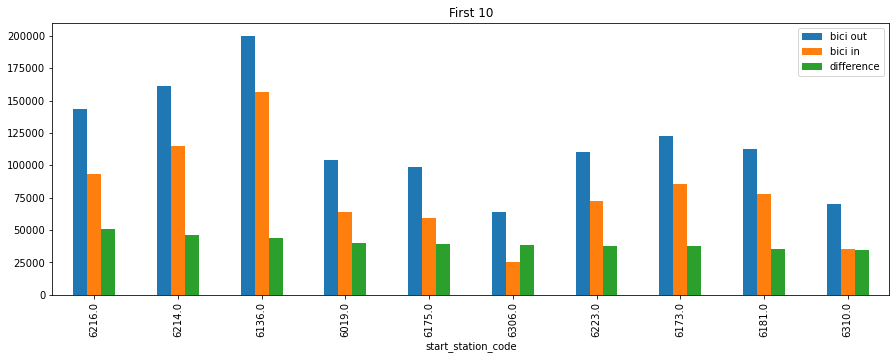

In [36]:
df_in_out = df_start_stations
df_in_out['bici in'] = df_end_stations['bici in']
df_in_out['difference'] = df_in_out['bici out'] - df_in_out['bici in']

df_in_out_sort = df_in_out.reset_index()
df_in_out_sort = df_in_out.sort_values(by = ['difference'], ascending=False)

df_in_out_sort[:10].set_index('start_station_code')[['bici out' , 'bici in' , 'difference']].plot(kind='bar', figsize=(15,5))
plt.title('First 10')

Text(0.5, 1.0, 'Last 10')

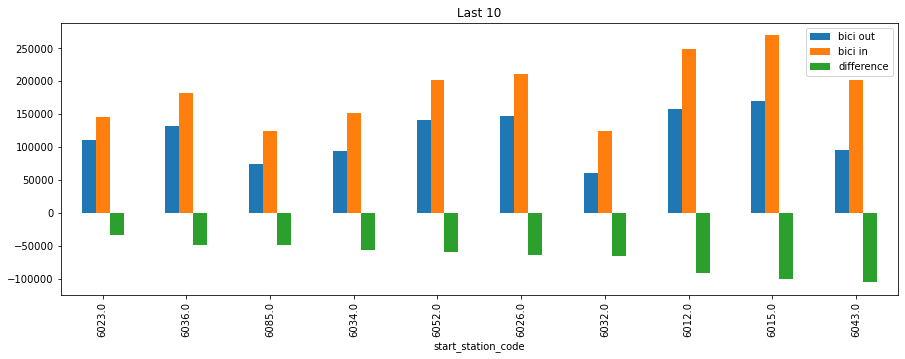

In [37]:
df_in_out_sort[-10:].set_index('start_station_code')[['bici out' , 'bici in' , 'difference']].plot(kind='bar', figsize=(15,5))
plt.title('Last 10')

In [90]:
df_in_out_sort.head()

,start_station_code,bici out,bici in,difference
210,6216.0,143645,92967,50678
208,6214.0,161311,115204,46107
132,6136.0,199872,156319,43553
26,6019.0,104175,63973,40202
169,6175.0,98328,59475,38853


# test to check station 6216

In [82]:

test_out = df_bixi[df_bixi['start_station_code'] == 6216]#.drop(columns=['end_date' , 'end_station_code' , 'duration_sec'])
test_out.sort_values(by = ['start_date'])
test_in = df_bixi[df_bixi['end_station_code'] == 6216]#.drop(columns=['start_date' , 'start_station_code' , 'duration_sec'])
test_in.sort_values(by = ['end_date'])

test_out.head()

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,year_month,year,month,day,hour
6,2014-04-15 00:21:00,6216.0,2014-04-15 01:08:00,6216.0,2847,1,2014-04,2014,4,1,0
16,2014-04-15 01:11:00,6216.0,2014-04-15 01:23:00,6164.0,770,1,2014-04,2014,4,1,1
147,2014-04-15 07:56:00,6216.0,2014-04-15 08:02:00,6202.0,340,1,2014-04,2014,4,1,7
413,2014-04-15 08:47:00,6216.0,2014-04-15 08:57:00,6027.0,574,1,2014-04,2014,4,1,8
487,2014-04-15 09:05:00,6216.0,2014-04-15 09:11:00,6047.0,355,1,2014-04,2014,4,1,9


In [83]:
test_all = test_out.append(test_in)
test_all = test_all.sort_values('start_date')
test_all['velo in'] = test_all['end_station_code']  == 6216
test_all.head()

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,year_month,year,month,day,hour,velo in
2,2014-04-15 00:01:00,6164.0,2014-04-15 00:18:00,6216.0,1031,1,2014-04,2014,4,1,0,True
6,2014-04-15 00:21:00,6216.0,2014-04-15 01:08:00,6216.0,2847,1,2014-04,2014,4,1,0,True
6,2014-04-15 00:21:00,6216.0,2014-04-15 01:08:00,6216.0,2847,1,2014-04,2014,4,1,0,True
16,2014-04-15 01:11:00,6216.0,2014-04-15 01:23:00,6164.0,770,1,2014-04,2014,4,1,1,False
147,2014-04-15 07:56:00,6216.0,2014-04-15 08:02:00,6202.0,340,1,2014-04,2014,4,1,7,False


Text(0.5, 1.0, 'Monday')

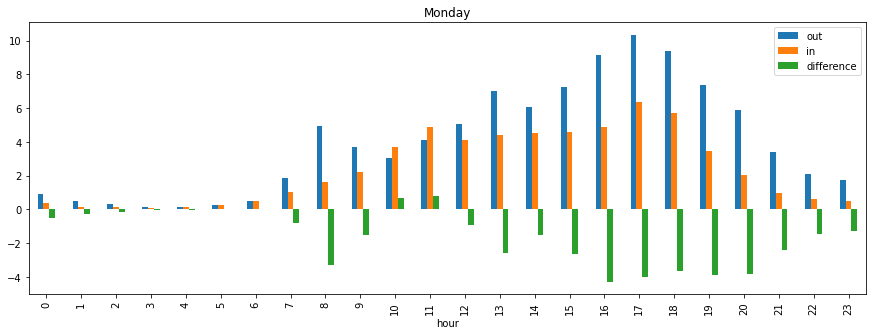

In [84]:
monday_out_test = test_out[test_out['day'] == 0]
monday_out = monday_out_test.pivot_table(index=['hour'], aggfunc='size').to_frame()  #pandas data frame of total mumber of trips for each hour on monday
monday_in_test = test_in[test_in['day'] == 0]
monday_in = monday_in_test.pivot_table(index=['hour'], aggfunc='size') #pandas series of total mumber of trips for each hour on monday
monday_out = monday_out.rename(columns={0 : 'out'})
monday_out ['in'] = monday_in
monday_out ['difference'] = monday_out ['in'] - monday_out ['out']

(monday_out/mtwt_day).plot(kind="bar", figsize=(15,5)) #number of trips for each hour - mtwt_day is the total number of 'mondays' in this period - see count_days nootebook
plt.title("Monday")

In [108]:
df_bixi.head()

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,year_month,year,month,day,hour
0,2014-04-15 00:01:00,6209.0,2014-04-15 00:18:00,6436.0,1061,1,2014-04,2014,4,1,0
1,2014-04-15 00:01:00,6214.0,2014-04-15 00:11:00,6248.0,615,1,2014-04,2014,4,1,0
2,2014-04-15 00:01:00,6164.0,2014-04-15 00:18:00,6216.0,1031,1,2014-04,2014,4,1,0
3,2014-04-15 00:01:00,6214.0,2014-04-15 00:24:00,6082.0,1382,1,2014-04,2014,4,1,0
4,2014-04-15 00:02:00,6149.0,2014-04-15 00:08:00,6265.0,347,1,2014-04,2014,4,1,0


# Continue here with the analysis

In [6]:
# create a data frame with number of bicycles that leave the station (in) and bicycles that arrive to the station (out)

#dataframes that group and count number of bycicles that leave the station 
velo_out = df_bixi.groupby(by=['start_station_code','year','month','day','hour'], as_index=False)['start_date'].count().rename(columns={'start_date' : 'velo_out','start_station_code':'station_code'})

#dataframes that group and count number of bycicles that arrive to the station 
velo_in = df_bixi.groupby(by=['end_station_code','year','month','day','hour'], as_index=False)['start_date'].count().rename(columns={'start_date' : 'velo_in','end_station_code':'station_code'})

#merge the two dataFrames and fill the values with 0, where no bicycle leave or arrive
df_station = velo_out.merge(velo_in,on=['station_code' , 'year' , 'month' , 'day' , 'hour'] , how='outer', copy=False).fillna(0)
df_station['difference'] = df_station['velo_in'] - df_station['velo_out'] # add a column with the difference

df_station.head()

,station_code,year,month,day,hour,velo_out,velo_in,difference
0,4000.0,2018,4,0,7,1.0,2.0,1.0
1,4000.0,2018,4,0,8,1.0,5.0,4.0
2,4000.0,2018,4,0,9,1.0,2.0,1.0
3,4000.0,2018,4,0,10,1.0,4.0,3.0
4,4000.0,2018,4,0,13,3.0,1.0,-2.0


Text(0.5, 1.0, 'Station : Parc Jeanne Mance (monument sir George-Etienne Cartier) | code : 6216  |   Day : Wednesday')

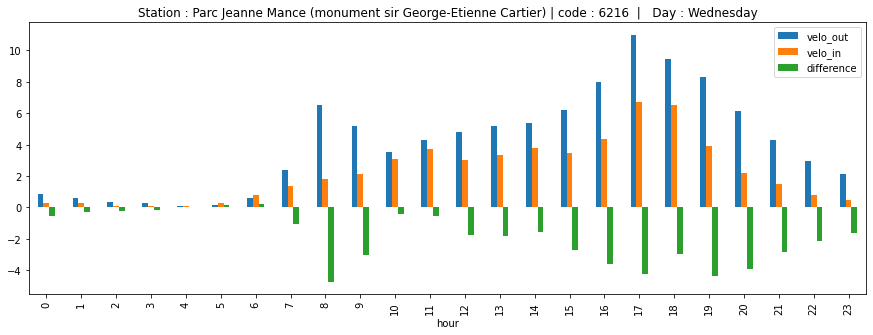

In [33]:
def station_day_plot(df , st_code , day):
    #create a dataframe to compare the number of bicycles that leave and arrive for each hour in a specific day and station
    #IMPUT:
    #df - Data Frame df_station
    #st_code - int code of the station
    #day - int number of the day 0 for Monday / 6 for Sunday
    #OUTPUT:
    #to_plot - DataFrame readey to plot
    #title - string for the title of the table
    #number_days - int with the number of days in this period - see count_days nootebook

    df_station = df[df['station_code'] == st_code]
    df_day = df_station[df_station['day'] == day]
    to_plot = df_day.groupby(by=['hour'])[['velo_out' , 'velo_in' , 'difference']].sum()
    
    title = ''
    
    number_days = mtwt_day

    name_st = df_stbx19[df_stbx19['Code'] == st_code ]['name'].tolist()
    

    if day == 0:
        title = 'Station : ' + name_st[0] + ' | code : ' + str(st_code) + '  |  ' ' Day : Monday'
    if day == 1:
        title = 'Station : ' + name_st[0] + ' | code : ' + str(st_code) + '  |  ' ' Day : Tuesday'
    if day == 2:
        title = 'Station : ' + name_st[0] + ' | code : ' + str(st_code) + '  |  ' ' Day : Wednesday'
    if day == 3:
        title = 'Station : ' + name_st[0] + ' | code : ' + str(st_code) + '  |  ' ' Day : Thursday'
    if day == 4:
        title = 'Station : ' + name_st[0] + ' | code : ' + str(st_code) + '  |  ' ' Day : Friday'
        number_days = f_day
    if day == 5:
        title = 'Station : ' + name_st[0] + ' | code : ' + str(st_code) + '  |  ' ' Day : Saturday'
        number_days = s_day
    if day == 6:
        title = 'Station : ' + name_st[0] + ' | code : ' + str(st_code) + '  |  ' ' Day : Sunday'
        number_days = s_day

    return (to_plot, title , number_days)

(to_plot , title, num_days) = station_day_plot(df_station , 6216 , 2)

(to_plot/num_days).plot(kind="bar", figsize=(15,5))
plt.title(title)

Text(0.5, 1.0, 'Station : Square Victoria (Viger / du Square-Victoria) | code : 6043  |   Day : Wednesday')

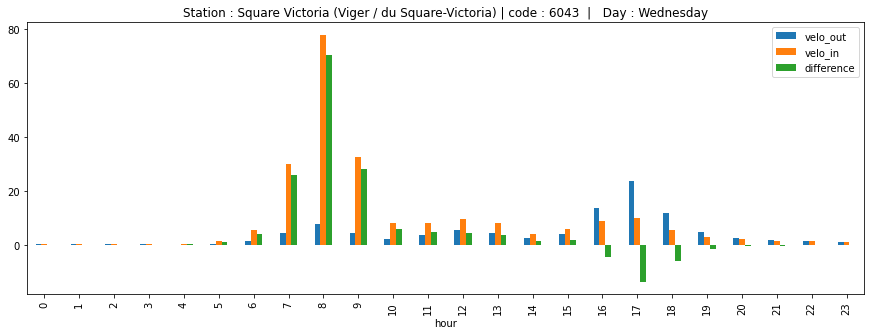

In [34]:
(to_plot , title, num_days) = station_day_plot(df_station , 6043 , 2)

(to_plot/num_days).plot(kind="bar", figsize=(15,5))
plt.title(title)